# 例2.1  P34页  原始形式

In [45]:
import numpy as np

class Perceptron:
    def __init__(self):  #清零
        self.weights = None
        self.bias = None

    def sign(self, value): #判断正负实例
        if value >= 0 :
            return 1      #>=0为正实例，标记结果为 1
        else:
            return -1     #<0为负实例，标记结果为-1

    def train(self, data_set, labels):  #训练过程
        lr = 1                          #learning rate
        data_set = np.array(data_set)   #用来产生数组  
        n = data_set.shape[0]           #n rows(行)  data_set.shape=[3,2]  
        m = data_set.shape[1]           #m cols(列)
        weights = np.zeros(m)           #按照输入数据的维度生成w初始值为0
        bias = 0                        #偏置初始化为0
        i = 1                           #按顺序引入实例点判断
        while i < n:
            if (labels[i] * self.sign(np.dot(weights, data_set[i]) + bias) == -1):  #it means this point is wrong(误分类)
                #  【((矩阵积)=矩阵w*点坐标[xn1,xn2]+偏置)的正负实例判断 】*Yi==-1  #应该是<0，用了sign，只能是±1                
                weights = weights + lr * labels[i] * data_set[i]                    #update weights w=w+ lr*Yi*Xi
                bias = bias + lr * labels[i]                                        ##update bias   b=b+ lr*Yi
                i = 0  #一直取第一个点直到第一个点被正确分类
                print("更新中:权重",weights,"偏置",bias)
            else:
                i += 1  #第一个点被正确分类，然后进行下一个点
        self.weights = weights  #保存权重和偏置给self，结束训练
        self.bias = bias
 
    def predict(self, data):    # used to predict
        if (self.weights is not None and self.bias is not None):
            return self.sign(np.dot(self.weights, data) + self.bias)
        else:
            return 0


if __name__ == "__main__":
    data_set = [[3, 3],
                [4, 3],
                [1, 1]]
    labels = [1, 1, -1]   #正负实例
    perceptron = Perceptron()   #构建网络模型
    perceptron.train(data_set, labels)   
    
    print("Final weights is:", perceptron.weights)
    print("Final bias is:", perceptron.bias)
    
    result = perceptron.predict([1, 1]) #带入数据预测
    print("prediction:", result)


更新中:权重 [-1. -1.] 偏置 -1
更新中:权重 [2. 2.] 偏置 0
更新中:权重 [1. 1.] 偏置 -1
更新中:权重 [0. 0.] 偏置 -2
更新中:权重 [3. 3.] 偏置 -1
更新中:权重 [2. 2.] 偏置 -2
更新中:权重 [1. 1.] 偏置 -3
Final weights is: [1. 1.]
Final bias is: -3
prediction: -1


# 例2.2 P38 对偶形式

In [46]:

import numpy as np

class PerceptronDual:
    def __init__(self):
        self.weights = None
        self.bias = None

    def sign(self, x):  # sign function
        return 1 if x >= 0 else -1

    def train(self, data_set, labels):
        lr = 1
        n = np.array(data_set).shape[0] #n means rows(行)
        data_set = np.mat(data_set)  #使用np.mat后，如果对原数组进行改变，矩阵也会相应发生变化-----绑定
        alpha = np.zeros(n) #指错误点的总迭代
        bias = 0
        i = 0
        while i < n:
            #在这一步中，我们省略了gram矩阵
            if (labels[i] * self.sign(sum(alpha * labels * data_set * data_set[i].T)+bias) == -1):
                alpha[i] = alpha[i] + lr
                bias = bias + lr * labels[i]
                i = 0
            else:
                i += 1
        self.weights = sum(alpha * labels * data_set)
        self.bias = bias

    def predict(self, data):
        data = np.array([data])
        if (self.weights is not None and self.bias is not None):
            return self.sign((self.weights * data.T) + self.bias)
        else:
            return 0

if __name__ == '__main__':
    data_set = [[3, 3],
                [4, 3],
                [1, 1]]
    labels = [1, 1, -1]
    perceptron = PerceptronDual()
    perceptron.train(data_set, labels)
    print("Final weights is:", perceptron.weights)
    print("Final bias is:", perceptron.bias)
    
    result = perceptron.predict([1, 1]) #带入数据预测
    print("prediction:", result)

Final weights is: [[1. 1.]]
Final bias is: -3
prediction: -1


#  课后题

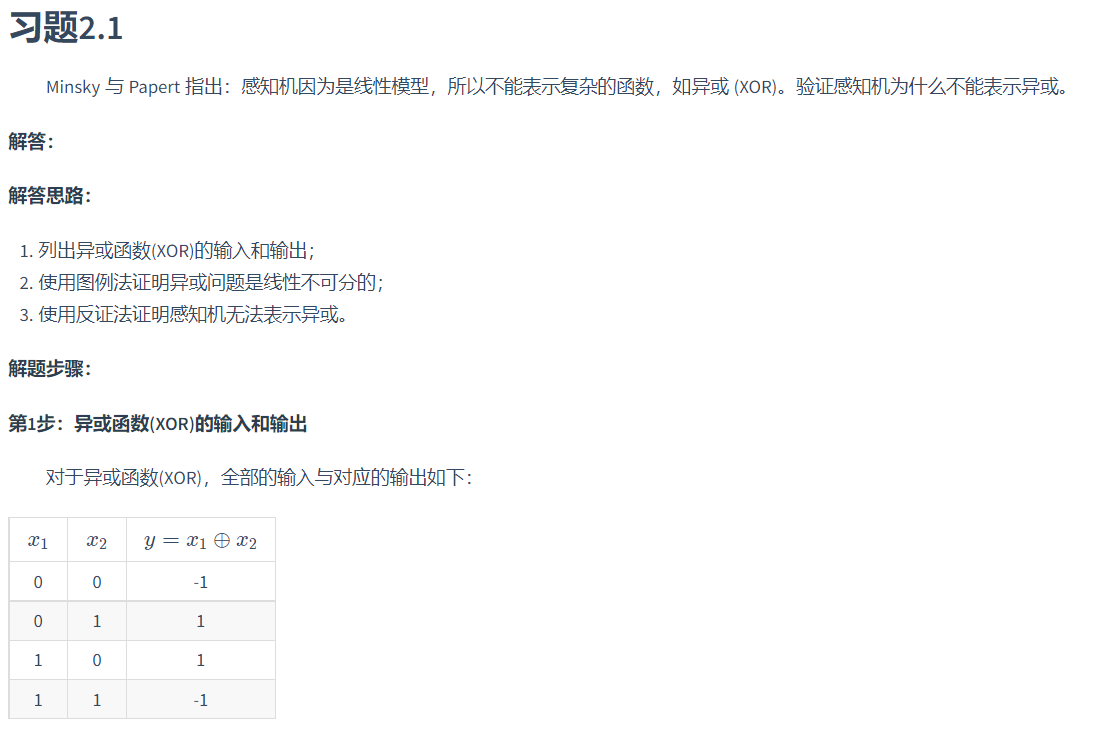

In [47]:
#第2步：使用图例法证明异或问题是线性不可分的

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 使用Dataframe表示异或的输入与输出数据
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [-1, 1, 1, -1]
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)
data = np.c_[x1, x2, y]
data = pd.DataFrame(data, index=None, columns=['x1', 'x2', 'y'])
data.head()


,x1,x2,y
0,0,0,-1
1,0,1,1
2,1,0,1
3,1,1,-1


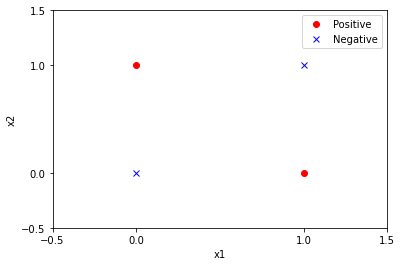

In [48]:
# 获取正类别（y=1）的数据
positive = data.loc[data['y'] == 1]
# 获取负类别（y=-1）的数据
negative = data.loc[data['y'] == -1]

# 绘制数据图
# 绘制坐标轴
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks([-0.5, 0, 1, 1.5])
plt.yticks([-0.5, 0, 1, 1.5])
# 添加坐标轴文字
plt.xlabel("x1")
plt.ylabel("x2")
# 绘制正、负样本点
plt.plot(positive['x1'], positive['x2'], "ro")
plt.plot(negative['x1'], negative['x2'], "bx")
# 添加图示
plt.legend(['Positive', 'Negative'])
plt.show()


 从上图可以看出，无法使用一条直线将两类样本分开，所以异或问题是线性不可分的

In [50]:
from sklearn.linear_model import Perceptron
import numpy as np

# 构造异或问题的训练数据集
X_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([-1, 1, 1, -1])

# 使用sklearn的Perceptron类构建感知机模型
perceptron_model = Perceptron()
# 进行模型训练
perceptron_model.fit(X_train, y)

# 打印模型参数
print("感知机模型的参数：w=", perceptron_model.coef_[
      0], "b=", perceptron_model.intercept_[0])


感知机模型的参数：w= [0. 0.] b= 0.0


# 上述使用sklearn的Perceptron类构建感知机模型，从模型的参数上观察，感知机模型无法表示异或。

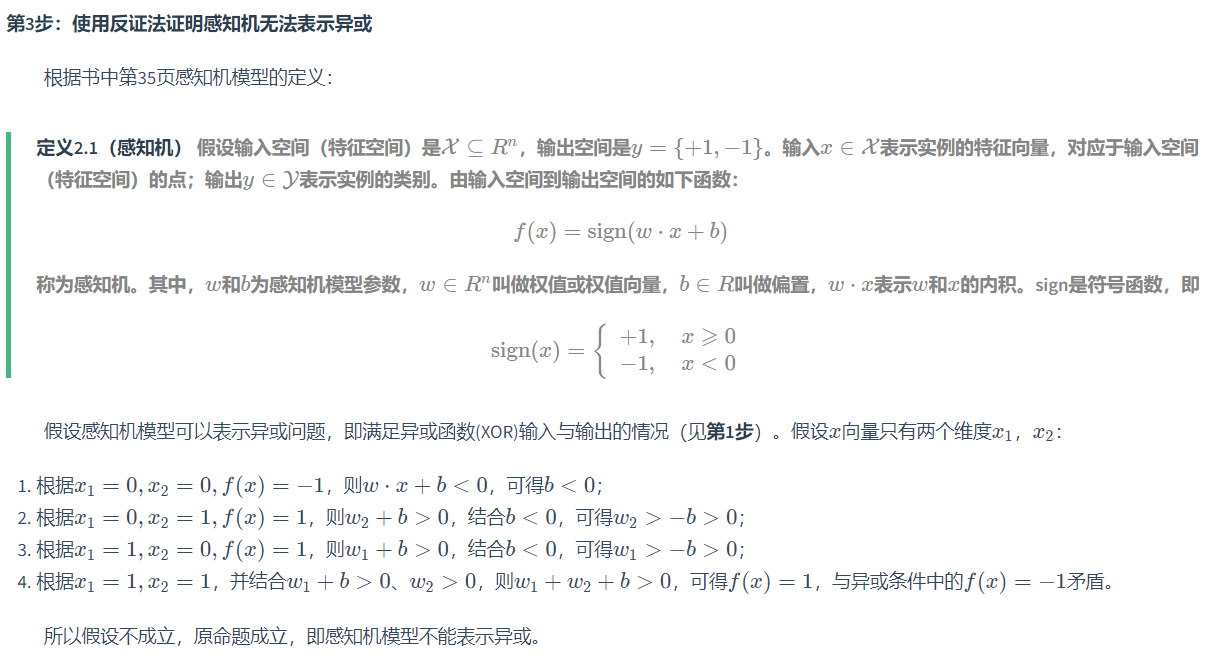

----

# 习题2.2
  模仿例题 2.1，构建从训练数据求解感知机模型的例子。

In [54]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib tk


class Perceptron:
    def __init__(self, X, Y, lr=0.001, plot=True):
        """
        初始化感知机
        :param X: 特征向量
        :param Y: 类别
        :param lr: 学习率
        :param plot: 是否绘制图形
        """
        self.X = X
        self.Y = Y
        self.lr = lr
        self.plot = plot
        if plot:
            self.__model_plot = self._ModelPlot(self.X, self.Y)
            self.__model_plot.open_in()

    def fit(self):
        # (1)初始化weight, b
        weight = np.zeros(self.X.shape[1])
        b = 0
        # 训练次数
        train_counts = 0
        # 分类错误标识
        mistake_flag = True
        while mistake_flag:
            # 开始前，将mistake_flag设置为False，用于判断本次循环是否有分类错误
            mistake_flag = False
            # (2)从训练集中选取x,y
            for index in range(self.X.shape[0]):
                if self.plot:
                    self.__model_plot.plot(weight, b, train_counts)
                # 损失函数
                loss = self.Y[index] * (weight @ self.X[index] + b)
                # (3)如果损失函数小于0，则该点是误分类点
                if loss <= 0:
                    # 更新weight, b
                    weight += self.lr * self.Y[index] * self.X[index]
                    b += self.lr * self.Y[index]
                    # 训练次数加1
                    train_counts += 1
                    print("Epoch {}, weight = {}, b = {}, formula: {}".format(
                        train_counts, weight, b, self.__model_plot.formula(weight, b)))
                    # 本次循环有误分类点（即分类错误），置为True
                    mistake_flag = True
                    break
        if self.plot:
            self.__model_plot.close()
        # (4)直至训练集中没有误分类点
        return weight, b

    class _ModelPlot:
        def __init__(self, X, Y):
            self.X = X
            self.Y = Y

        @staticmethod
        def open_in():
            # 打开交互模式，用于展示动态交互图
            plt.ion()

        @staticmethod
        def close():
            # 关闭交互模式，并显示最终的图形
            plt.ioff()
            plt.show()

        def plot(self, weight, b, epoch):
            plt.cla()
            # x轴表示x1
            plt.xlim(0, np.max(self.X.T[0]) + 1)
            # y轴表示x2
            plt.ylim(0, np.max(self.X.T[1]) + 1)
            # 画出散点图，并添加图示
            scatter = plt.scatter(self.X.T[0], self.X.T[1], c=self.Y)
            plt.legend(*scatter.legend_elements())
            if True in list(weight == 0):
                plt.plot(0, 0)
            else:
                x1 = -b / weight[0]
                x2 = -b / weight[1]
                # 画出分离超平面
                plt.plot([x1, 0], [0, x2])
                # 绘制公式
                text = self.formula(weight, b)
                plt.text(0.3, x2 - 0.1, text)
            plt.title('Epoch %d' % epoch)
            plt.pause(0.01)

        @staticmethod
        def formula(weight, b):
            text = 'x1 ' if weight[0] == 1 else '%d*x1 ' % weight[0]
            text += '+ x2 ' if weight[1] == 1 else (
                '+ %d*x2 ' % weight[1] if weight[1] > 0 else '- %d*x2 ' % -weight[1])
            text += '= 0' if b == 0 else ('+ %d = 0' %
                                          b if b > 0 else '- %d = 0' % -b)
            return text

        
X = np.array([[3, 3], [4, 3], [1, 1]])
Y = np.array([1, 1, -1])
model = Perceptron(X, Y, lr=1)
weight, b = model.fit()

Epoch 1, weight = [3. 3.], b = 1, formula: 3*x1 + 3*x2 + 1 = 0
Epoch 2, weight = [2. 2.], b = 0, formula: 2*x1 + 2*x2 = 0
Epoch 3, weight = [1. 1.], b = -1, formula: x1 + x2 - 1 = 0
Epoch 4, weight = [0. 0.], b = -2, formula: 0*x1 - 0*x2 - 2 = 0
Epoch 5, weight = [3. 3.], b = -1, formula: 3*x1 + 3*x2 - 1 = 0
Epoch 6, weight = [2. 2.], b = -2, formula: 2*x1 + 2*x2 - 2 = 0
Epoch 7, weight = [1. 1.], b = -3, formula: x1 + x2 - 3 = 0


----

# 习题2.3
  证明以下定理：样本集线性可分的充分必要条件是正实例点所构成的凸壳与负实例点所构成的凸壳互不相交。

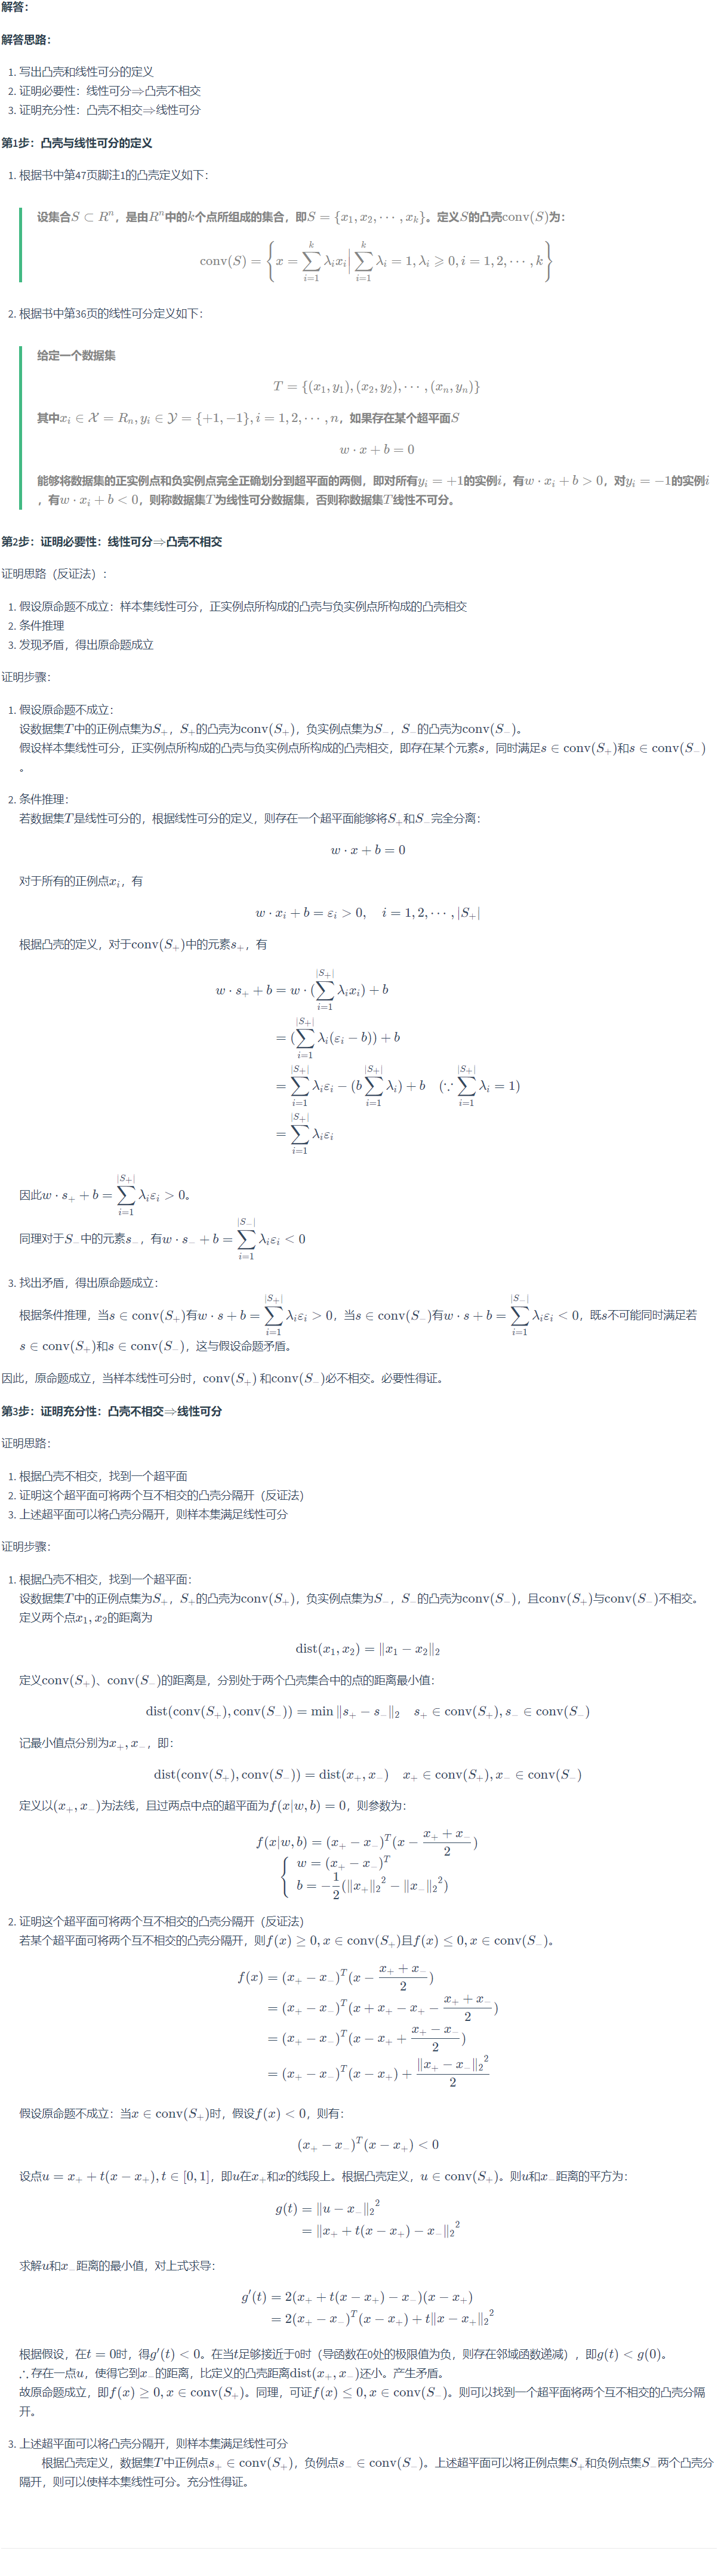

# scikit-learn实例实战1

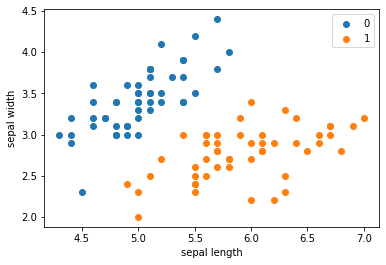

In [4]:
import sklearn
from sklearn.linear_model import Perceptron
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# load data   iris数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

# print(iris)
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])


[[ 23.2 -38.7]]
[-5.]


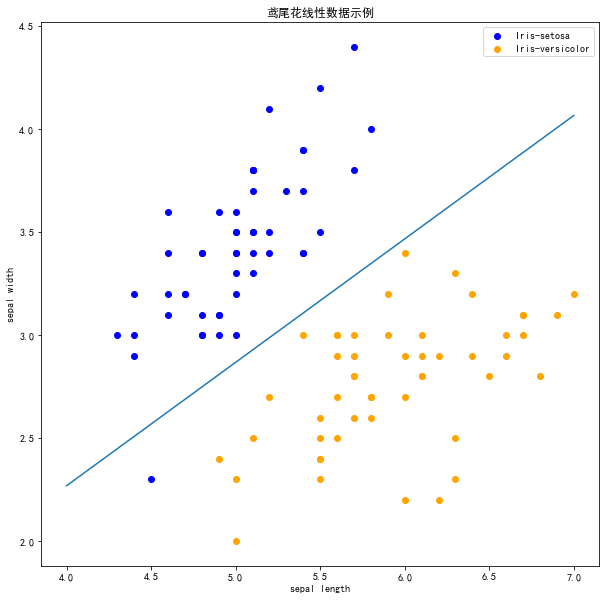

In [6]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

# Weights assigned to the features.
print(clf.coef_)

# 截距 Constants in decision function.
print(clf.intercept_)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

##  注意 !

 在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个tol参数。

 tol 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 tol=None 使之可以继续迭代：

clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)

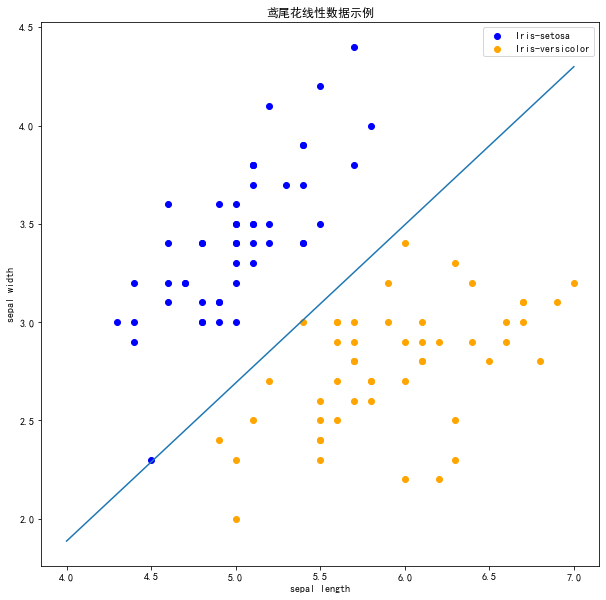

In [7]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# Nice！

#  实战二

In [8]:
'''
数据集：Mnist
训练集数量：60000
测试集数量：10000
------------------------------
运行结果：
正确率：81.72%（二分类）
运行时长：78.6s
'''

import numpy as np
import time

def loadData(fileName):
    '''
    加载Mnist数据集
    :param fileName:要加载的数据集路径
    :return: list形式的数据集及标记
    '''
    print('start to read data')
    # 存放数据及标记的list
    dataArr = []; labelArr = []
    # 打开文件
    fr = open(fileName, 'r')
    # 将文件按行读取
    for line in fr.readlines():
        # 对每一行数据按切割福','进行切割，返回字段列表
        curLine = line.strip().split(',')

        # Mnsit有0-9是个标记，由于是二分类任务，所以将>=5的作为1，<5为-1
        if int(curLine[0]) >= 5:
            labelArr.append(1)
        else:
            labelArr.append(-1)
        #存放标记
        #[int(num) for num in curLine[1:]] -> 遍历每一行中除了以第一哥元素（标记）外将所有元素转换成int类型
        #[int(num)/255 for num in curLine[1:]] -> 将所有数据除255归一化(非必须步骤，可以不归一化)
        dataArr.append([int(num)/255 for num in curLine[1:]])

    #返回data和label
    return dataArr, labelArr

def perceptron(dataArr, labelArr, iter=50):
    '''
    感知器训练过程
    :param dataArr:训练集的数据 (list)
    :param labelArr: 训练集的标签(list)
    :param iter: 迭代次数，默认50
    :return: 训练好的w和b
    '''
    print('start to trans')
    #将数据转换成矩阵形式（在机器学习中因为通常都是向量的运算，转换称矩阵形式方便运算）
    #转换后的数据中每一个样本的向量都是横向的
    dataMat = np.mat(dataArr)
    #将标签转换成矩阵，之后转置(.T为转置)。
    #转置是因为在运算中需要单独取label中的某一个元素，如果是1xN的矩阵的话，无法用label[i]的方式读取
    #对于只有1xN的label可以不转换成矩阵，直接label[i]即可，这里转换是为了格式上的统一
    labelMat = np.mat(labelArr).T
    #获取数据矩阵的大小，为m*n
    m, n = np.shape(dataMat)
    #创建初始权重w，初始值全为0。
    #np.shape(dataMat)的返回值为m，n -> np.shape(dataMat)[1])的值即为n，与
    #样本长度保持一致
    w = np.zeros((1, np.shape(dataMat)[1]))
    #初始化偏置b为0
    b = 0
    #初始化步长，也就是梯度下降过程中的n，控制梯度下降速率
    h = 0.0001

    #进行iter次迭代计算
    for k in range(iter):
        #对于每一个样本进行梯度下降
        #李航书中在2.3.1开头部分使用的梯度下降，是全部样本都算一遍以后，统一
        #进行一次梯度下降
        #在2.3.1的后半部分可以看到（例如公式2.6 2.7），求和符号没有了，此时用
        #的是随机梯度下降，即计算一个样本就针对该样本进行一次梯度下降。
        #两者的差异各有千秋，但较为常用的是随机梯度下降。
        for i in range(m):
            #获取当前样本的向量
            xi = dataMat[i]
            #获取当前样本所对应的标签
            yi = labelMat[i]
            #判断是否是误分类样本
            #误分类样本特诊为： -yi(w*xi+b)>=0，详细可参考书中2.2.2小节
            #在书的公式中写的是>0，实际上如果=0，说明改点在超平面上，也是不正确的
            if -1 * yi * (w * xi.T + b) >= 0:
                #对于误分类样本，进行梯度下降，更新w和b
                w = w + h *  yi * xi
                b = b + h * yi
        #打印训练进度
        print('Round %d:%d training' % (k, iter))

    #返回训练完的w、b
    return w, b


def model_test(dataArr, labelArr, w, b):
    '''
    测试准确率
    :param dataArr:测试集
    :param labelArr: 测试集标签
    :param w: 训练获得的权重w
    :param b: 训练获得的偏置b
    :return: 正确率
    '''
    print('start to test')
    #将数据集转换为矩阵形式方便运算
    dataMat = np.mat(dataArr)
    #将label转换为矩阵并转置，详细信息参考上文perceptron中
    #对于这部分的解说
    labelMat = np.mat(labelArr).T

    #获取测试数据集矩阵的大小
    m, n = np.shape(dataMat)
    #错误样本数计数
    errorCnt = 0
    #遍历所有测试样本
    for i in range(m):
        #获得单个样本向量
        xi = dataMat[i]
        #获得该样本标记
        yi = labelMat[i]
        #获得运算结果
        result = -1 * yi * (w * xi.T + b)
        #如果-yi(w*xi+b)>=0，说明该样本被误分类，错误样本数加一
        if result >= 0: errorCnt += 1
    #正确率 = 1 - （样本分类错误数 / 样本总数）
    accruRate = 1 - (errorCnt / m)
    #返回正确率
    return accruRate

if __name__ == '__main__':
    #获取当前时间
    #在文末同样获取当前时间，两时间差即为程序运行时间
    start = time.time()

    #获取训练集及标签
    trainData, trainLabel = loadData('../Mnist/mnist_train.csv')
    #获取测试集及标签
    testData, testLabel = loadData('../Mnist/mnist_test.csv')

    #训练获得权重
    w, b = perceptron(trainData, trainLabel, iter = 30)
    #进行测试，获得正确率
    accruRate = model_test(testData, testLabel, w, b)

    #获取当前时间，作为结束时间
    end = time.time()
    #显示正确率
    print('accuracy rate is:', accruRate)
    #显示用时时长
    print('time span:', end - start)



start to read data
start to read data
start to trans
Round 0:30 training
Round 1:30 training
Round 2:30 training
Round 3:30 training
Round 4:30 training
Round 5:30 training
Round 6:30 training
Round 7:30 training
Round 8:30 training
Round 9:30 training
Round 10:30 training
Round 11:30 training
Round 12:30 training
Round 13:30 training
Round 14:30 training
Round 15:30 training
Round 16:30 training
Round 17:30 training
Round 18:30 training
Round 19:30 training
Round 20:30 training
Round 21:30 training
Round 22:30 training
Round 23:30 training
Round 24:30 training
Round 25:30 training
Round 26:30 training
Round 27:30 training
Round 28:30 training
Round 29:30 training
start to test
accuracy rate is: 0.8172
time span: 74.69448328018188
